### Jupyter notebook de avaliação dos dados da produção da Brazilian FISH mensalmente (toneladas)

In [1]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import xlsxwriter
from tabulate import tabulate
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler

# Required Libraries
import os


In [2]:
# Define the folder path where your Excel files are stored
folder_path = 'vendasunidade3parafrigorifico2022'

# Initialize an empty dataframe to store the data from all Excel files
combined_df = pd.DataFrame()

# Loop through all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.xlsx'):
        # Construct the full file path
        file_path = os.path.join(folder_path, filename)
        
        # Read the Excel file into a dataframe
        excel_data = pd.read_excel(file_path)  # You might need additional arguments based on your Excel file
        
        # Append the data from the current Excel file to the combined dataframe
        combined_df = combined_df.append(excel_data, ignore_index=True)

# Now combined_df contains the data from all Excel files in the folder
print(combined_df)

C:\Users\crist\AppData\Local\Temp\ipykernel_11912\934284517.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(excel_data, ignore_index=True)
C:\Users\crist\AppData\Local\Temp\ipykernel_11912\934284517.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(excel_data, ignore_index=True)
C:\Users\crist\AppData\Local\Temp\ipykernel_11912\934284517.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(excel_data, ignore_index=True)
C:\Users\crist\AppData\Local\Temp\ipykernel_11912\934284517.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  

     ID LOTE DATA ENTRADA DATA MOVIMENTAÇÃO   n° DIAS  HORA APLICATIVO  \
0       7325   2022-01-13        2022-04-04        81              NaN   
1       7607   2022-01-31        2022-04-04        63              NaN   
2       7489   2022-01-24        2022-04-04        70              NaN   
3       7361   2022-01-17        2022-04-04        77              NaN   
4       7600   2022-01-28        2022-04-04        66              NaN   
..       ...          ...               ...       ...              ...   
649     9450   2022-06-18        2022-09-28       102              NaN   
650     9564   2022-06-29        2022-09-29        92              NaN   
651     9316   2022-06-09        2022-09-29       112              NaN   
652     9436   2022-06-17        2022-09-29       104              NaN   
653     9308   2022-06-08        2022-09-29       113              NaN   

    TANQUE ORIGEM    LINHA ORIGEM  ORDEM LINHA    UNIDADE         LOTE  ...  \
0           TR689  U.3 - LINHA 0

C:\Users\crist\AppData\Local\Temp\ipykernel_11912\934284517.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(excel_data, ignore_index=True)
C:\Users\crist\AppData\Local\Temp\ipykernel_11912\934284517.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(excel_data, ignore_index=True)
C:\Users\crist\AppData\Local\Temp\ipykernel_11912\934284517.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(excel_data, ignore_index=True)


In [3]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID LOTE                  654 non-null    int64         
 1   DATA ENTRADA             654 non-null    datetime64[ns]
 2   DATA MOVIMENTAÇÃO        654 non-null    datetime64[ns]
 3    n° DIAS                 654 non-null    int64         
 4   HORA APLICATIVO          0 non-null      float64       
 5   TANQUE ORIGEM            654 non-null    object        
 6   LINHA ORIGEM             557 non-null    object        
 7   ORDEM LINHA              654 non-null    int64         
 8   UNIDADE                  654 non-null    object        
 9   LOTE                     654 non-null    object        
 10  QTD INICIAL              654 non-null    int64         
 11  CONVERSÃO                654 non-null    float64       
 12  FASE ORIGEM              654 non-nul

In [4]:
combined_df.columns = combined_df.columns.str.strip()

In [5]:
#combined_df_num=combined_df.select_dtypes(include='number')
combined_df.isnull().sum().sort_values(ascending=False)

HORA APLICATIVO            654
LINHA ORIGEM                97
SALDO DIA ANTERIOR           8
BIOMASSA ESPERADA TOTAL      8
BIOMASSA ESPERADA            8
PERCENTUAL PREV X REAL       8
DIF. PESO                    8
PESO ESPERADO                8
CURVA                        0
TIPO                         0
MOTIVO DE DESCARTE           0
JUSTIFICATIVA                0
ESPECIE                      0
ID LOTE                      0
% MORTE DIA ANTERIOR         0
LOTE DESTINO                 0
TANQUE DESTINO               0
FASE DESTINO                 0
TAMANHO DESTINO              0
LINHA DESTINO                0
ORDEM LINHA DESTINO          0
UNIDADE DESTINO              0
TIPO DESTINO                 0
TIPO ORIGEM                  0
BIOMASSA                     0
DATA ENTRADA                 0
PESO                         0
QUANTIDADE                   0
SOBREVIVENCIA                0
TAMANHO ORIGEM               0
FASE ORIGEM                  0
CONVERSÃO                    0
QTD INIC

In [6]:
combined_df = combined_df.drop(columns=[
'HORA APLICATIVO',
'LOTE DESTINO',
'TANQUE DESTINO',
'FASE DESTINO',
'TAMANHO DESTINO',
'LINHA DESTINO',
'ORDEM LINHA DESTINO',
'UNIDADE DESTINO',
'MOTIVO DE DESCARTE',
'JUSTIFICATIVA',
'TIPO DESTINO'
])

combined_df.head()

,ID LOTE,DATA ENTRADA,DATA MOVIMENTAÇÃO,n° DIAS,TANQUE ORIGEM,LINHA ORIGEM,ORDEM LINHA,UNIDADE,LOTE,QTD INICIAL,...,BIOMASSA,BIOMASSA ESPERADA,BIOMASSA ESPERADA TOTAL,SALDO DIA ANTERIOR,% MORTE DIA ANTERIOR,TIPO,ESPECIE,CURVA,TIPO ORIGEM,USUARIO
0,7325,2022-01-13,2022-04-04,81,TR689,U.3 - LINHA 07,8,Unidade 3,L053-VAC,8041,...,1430.568,1511.002713,7378.683020,7867.0,0,Venda,Tilápia,F4 VERÃO - Engorda 100%,Engorda,Nathan
1,7607,2022-01-31,2022-04-04,63,TR246,U.3 - LINHA 10,19,Unidade 3,L054-VAC-Z,4081,...,4068.640,4022.534151,3779.875479,4050.0,0,Venda,Tilápia,F4 VERÃO - Engorda 100%,Engorda,Nathan
2,7489,2022-01-24,2022-04-04,70,TR222,U.3 - LINHA 08,3,Unidade 3,L048-VAC,4058,...,4003.376,3798.789361,3796.914342,4050.0,0,Venda,Tilápia,F4 VERÃO - Engorda 100%,Engorda,Nathan
3,7361,2022-01-17,2022-04-04,77,TR634,U.3 - LINHA 13,16,Unidade 3,L050-VAC,8389,...,6582.886,6835.935871,6500.099000,6871.0,0,Venda,Tilápia,F4 VERÃO - Engorda 100%,Engorda,Nathan
4,7600,2022-01-28,2022-04-04,66,TR247,U.3 - LINHA 10,17,Unidade 3,L054-VAC-Z,4014,...,3966.115,3924.921252,3786.939431,4007.0,0,Venda,Tilápia,F4 VERÃO - Engorda 100%,Engorda,Nathan


In [7]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID LOTE                  654 non-null    int64         
 1   DATA ENTRADA             654 non-null    datetime64[ns]
 2   DATA MOVIMENTAÇÃO        654 non-null    datetime64[ns]
 3   n° DIAS                  654 non-null    int64         
 4   TANQUE ORIGEM            654 non-null    object        
 5   LINHA ORIGEM             557 non-null    object        
 6   ORDEM LINHA              654 non-null    int64         
 7   UNIDADE                  654 non-null    object        
 8   LOTE                     654 non-null    object        
 9   QTD INICIAL              654 non-null    int64         
 10  CONVERSÃO                654 non-null    float64       
 11  FASE ORIGEM              654 non-null    object        
 12  TAMANHO ORIGEM           654 non-nul

In [9]:
dados = combined_df.copy()

tabela = tabulate(dados, headers="firstrow", tablefmt="sheet")

dados.to_excel('all.xlsx', index = False)

#all
#sum_month
#sum_week
#median_month
#median_week

In [10]:
combined_df.select_dtypes(include='number').head(15)

,ID LOTE,n° DIAS,ORDEM LINHA,QTD INICIAL,CONVERSÃO,SOBREVIVENCIA,QUANTIDADE,PESO,PESO ESPERADO,DIF. PESO,PERCENTUAL PREV X REAL,BIOMASSA,BIOMASSA ESPERADA,BIOMASSA ESPERADA TOTAL,SALDO DIA ANTERIOR,% MORTE DIA ANTERIOR
0,7325,81,8,8041,2.475989,97.05,1611,888,937.928438,49.928438,94.676733,1430.568,1511.002713,7378.683020,7867.0,0
1,7607,63,19,4081,1.843203,99.29,4310,944,933.302587,-10.697413,101.146189,4068.640,4022.534151,3779.875479,4050.0,0
2,7489,70,3,4058,1.930490,99.80,4052,988,937.509714,-50.490286,105.385575,4003.376,3798.789361,3796.914342,4050.0,0
3,7361,77,16,8389,2.345529,99.20,7226,911,946.019357,35.019357,96.298241,6582.886,6835.935871,6500.099000,6871.0,0
4,7600,66,17,4014,1.964138,99.83,4153,955,945.080966,-9.919034,101.049543,3966.115,3924.921252,3786.939431,4007.0,0
5,7315,81,13,8078,2.178425,99.27,8274,900,944.595143,44.595143,95.278915,7446.600,7815.580215,7572.819264,8017.0,0
6,7725,55,0,3028,3.215404,95.12,2883,866,936.626697,70.626697,92.459461,2496.678,2700.294769,2799.577199,2989.0,0
7,6745,124,0,4006,2.292518,96.34,3871,833,908.099849,75.099849,91.730001,3224.543,3515.254517,3507.989719,3863.0,0
8,7671,56,17,8075,2.528648,99.37,8404,866,939.104979,73.104979,92.215462,7277.864,7892.238247,7533.500145,8022.0,0
9,7325,82,8,8041,2.475989,97.05,6193,888,888.000000,0.000000,100.000000,5499.384,5499.384000,5555.328000,6256.0,0


In [11]:
combined_df.select_dtypes(include='object').head(5)

,TANQUE ORIGEM,LINHA ORIGEM,UNIDADE,LOTE,FASE ORIGEM,TAMANHO ORIGEM,TIPO,ESPECIE,CURVA,TIPO ORIGEM,USUARIO
0,TR689,U.3 - LINHA 07,Unidade 3,L053-VAC,Fase 4,M,Venda,Tilápia,F4 VERÃO - Engorda 100%,Engorda,Nathan
1,TR246,U.3 - LINHA 10,Unidade 3,L054-VAC-Z,Fase 4,G,Venda,Tilápia,F4 VERÃO - Engorda 100%,Engorda,Nathan
2,TR222,U.3 - LINHA 08,Unidade 3,L048-VAC,Fase 4,G,Venda,Tilápia,F4 VERÃO - Engorda 100%,Engorda,Nathan
3,TR634,U.3 - LINHA 13,Unidade 3,L050-VAC,Fase 4,G,Venda,Tilápia,F4 VERÃO - Engorda 100%,Engorda,Nathan
4,TR247,U.3 - LINHA 10,Unidade 3,L054-VAC-Z,Fase 4,G,Venda,Tilápia,F4 VERÃO - Engorda 100%,Engorda,Nathan


In [12]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID LOTE                  654 non-null    int64         
 1   DATA ENTRADA             654 non-null    datetime64[ns]
 2   DATA MOVIMENTAÇÃO        654 non-null    datetime64[ns]
 3   n° DIAS                  654 non-null    int64         
 4   TANQUE ORIGEM            654 non-null    object        
 5   LINHA ORIGEM             557 non-null    object        
 6   ORDEM LINHA              654 non-null    int64         
 7   UNIDADE                  654 non-null    object        
 8   LOTE                     654 non-null    object        
 9   QTD INICIAL              654 non-null    int64         
 10  CONVERSÃO                654 non-null    float64       
 11  FASE ORIGEM              654 non-null    object        
 12  TAMANHO ORIGEM           654 non-nul

In [13]:
#for col in combined_df.select_dtypes(include='object').columns:
#    print(col)
for col in combined_df.columns:
   print(col)

ID LOTE
DATA ENTRADA
DATA MOVIMENTAÇÃO
n° DIAS
TANQUE ORIGEM
LINHA ORIGEM
ORDEM LINHA
UNIDADE
LOTE
QTD INICIAL
CONVERSÃO
FASE ORIGEM
TAMANHO ORIGEM
SOBREVIVENCIA
QUANTIDADE
PESO
PESO ESPERADO
DIF. PESO
PERCENTUAL PREV X REAL
BIOMASSA
BIOMASSA ESPERADA
BIOMASSA ESPERADA TOTAL
SALDO DIA ANTERIOR
% MORTE DIA ANTERIOR
TIPO
ESPECIE
CURVA
TIPO ORIGEM
USUARIO


In [14]:
for col in combined_df.select_dtypes(include='number').columns:
    print(col)

ID LOTE
n° DIAS
ORDEM LINHA
QTD INICIAL
CONVERSÃO
SOBREVIVENCIA
QUANTIDADE
PESO
PESO ESPERADO
DIF. PESO
PERCENTUAL PREV X REAL
BIOMASSA
BIOMASSA ESPERADA
BIOMASSA ESPERADA TOTAL
SALDO DIA ANTERIOR
% MORTE DIA ANTERIOR


In [15]:
df=combined_df.copy()

In [16]:
# Assuming you have a DataFrame 'df' with a column named 'DATA MOVIMENTAÇÃO'
# containing the dates

# Sample DataFrame creation
#data = {'DATA MOVIMENTAÇÃO': pd.date_range(start='2022-01-01', end='2022-04-01', freq='D'),
#        'value': range(1, 92)}
#df = pd.DataFrame(data)

# Convert 'DATA MOVIMENTAÇÃO' to datetime if it's not already
df['DATA MOVIMENTAÇÃO'] = pd.to_datetime(df['DATA MOVIMENTAÇÃO'])

# Divide data by week
weekly_data = df.groupby(pd.Grouper(key='DATA MOVIMENTAÇÃO', freq='W-FRI')).sum()

# Divide data by month
monthly_data = df.groupby(pd.Grouper(key='DATA MOVIMENTAÇÃO', freq='M')).sum()

#print("Weekly Data:")
#print(weekly_data)
#print("\nMonthly Data:")
#print(monthly_data)

C:\Users\crist\AppData\Local\Temp\ipykernel_11912\2887089764.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weekly_data = df.groupby(pd.Grouper(key='DATA MOVIMENTAÇÃO', freq='W-FRI')).sum()
C:\Users\crist\AppData\Local\Temp\ipykernel_11912\2887089764.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_data = df.groupby(pd.Grouper(key='DATA MOVIMENTAÇÃO', freq='M')).sum()


In [17]:
## save sum week
sum_week = weekly_data.copy()
tabela = tabulate(sum_week, headers="firstrow", tablefmt="sheet")
sum_week.to_excel('sum_week.xlsx', index = False)

######################################################################

## save sum month
sum_month = monthly_data.copy()
tabela = tabulate(sum_month, headers="firstrow", tablefmt="sheet")
sum_month.to_excel('sum_month.xlsx', index = False)

In [16]:
weekly_data=weekly_data.reset_index()

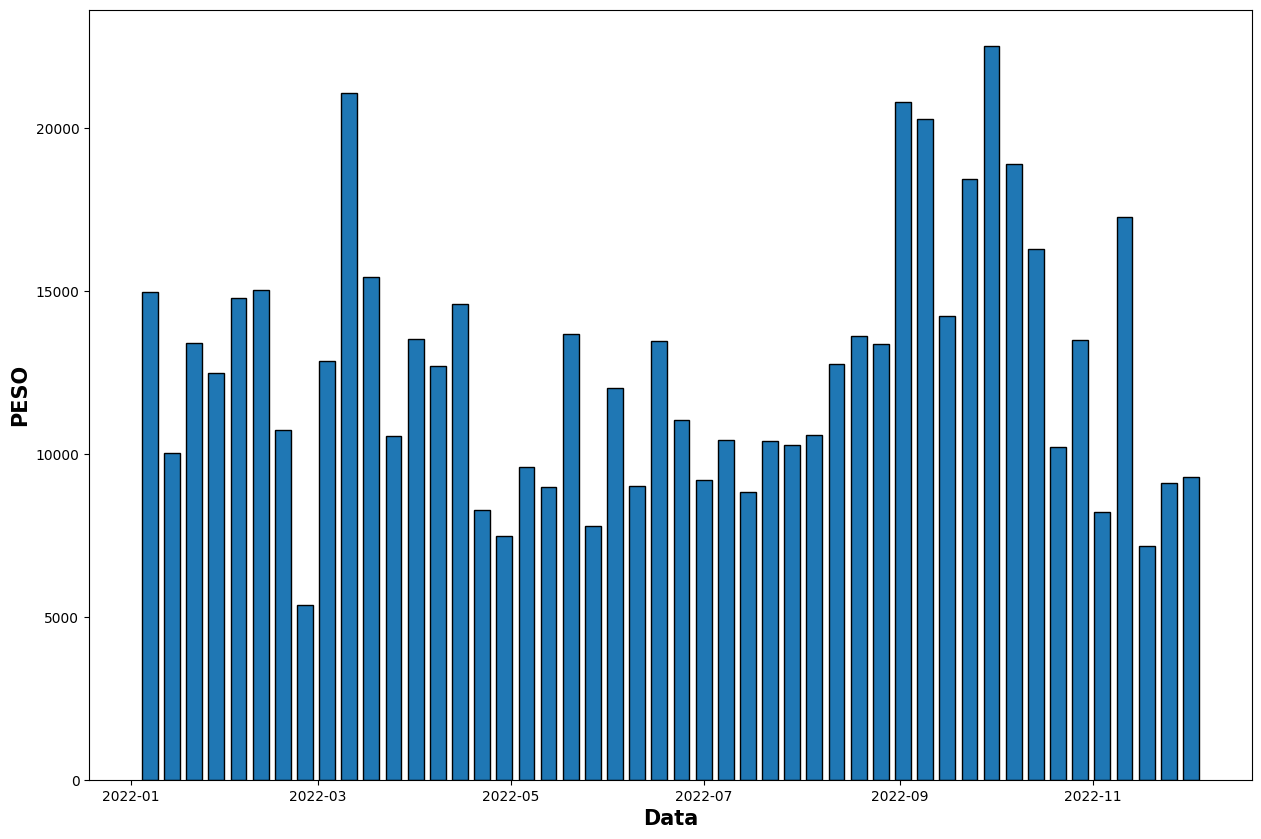

In [17]:
name = weekly_data['DATA MOVIMENTAÇÃO'].head(48)
price = weekly_data['PESO'].head(48)
 
# Figure Size
fig = plt.figure(figsize =(15, 10))
 
# Horizontal Bar Plot
plt.bar(name[0:48], price[0:48], width = 5, edgecolor ='black')
 
# NAME The AXES
plt.xlabel('Data', fontweight ='bold', fontsize = 15) 
plt.ylabel('PESO', fontweight ='bold', fontsize = 15)  
 
# Show Plot
plt.show()

In [18]:
weekly_data.head()

,DATA MOVIMENTAÇÃO,ID LOTE,n° DIAS,ORDEM LINHA,QTD INICIAL,CONVERSÃO,SOBREVIVENCIA,QUANTIDADE,PESO,PESO ESPERADO,DIF. PESO,PERCENTUAL PREV X REAL,BIOMASSA,BIOMASSA ESPERADA,BIOMASSA ESPERADA TOTAL,SALDO DIA ANTERIOR,% MORTE DIA ANTERIOR
0,2022-01-07,95718,1936,150,96005,33.736605,1488.16,80541,14960,15679.167955,719.167955,1526.760611,73998.089,78624.800091,82742.026578,84754.0,0
1,2022-01-14,67518,1245,142,88624,24.468202,1016.22,75492,10029,10834.470874,805.470874,1018.189982,68994.831,74418.084688,81044.453961,82275.0,0
2,2022-01-21,86845,1560,109,103561,29.868687,1286.93,82185,13421,13766.907510,345.907510,1364.843312,77992.063,80779.427340,90154.416200,91731.0,0
3,2022-01-28,81715,1421,160,102306,27.318657,1202.73,71793,12486,12878.811862,392.811862,1260.473253,68993.124,71079.515739,84424.548646,85282.0,0
4,2022-02-04,95322,1613,119,118476,30.930600,1377.04,86007,14786,15002.240397,216.240397,1478.188723,84915.479,86012.344000,97601.019468,97705.0,0


In [32]:
monthly_data=monthly_data.reset_index()


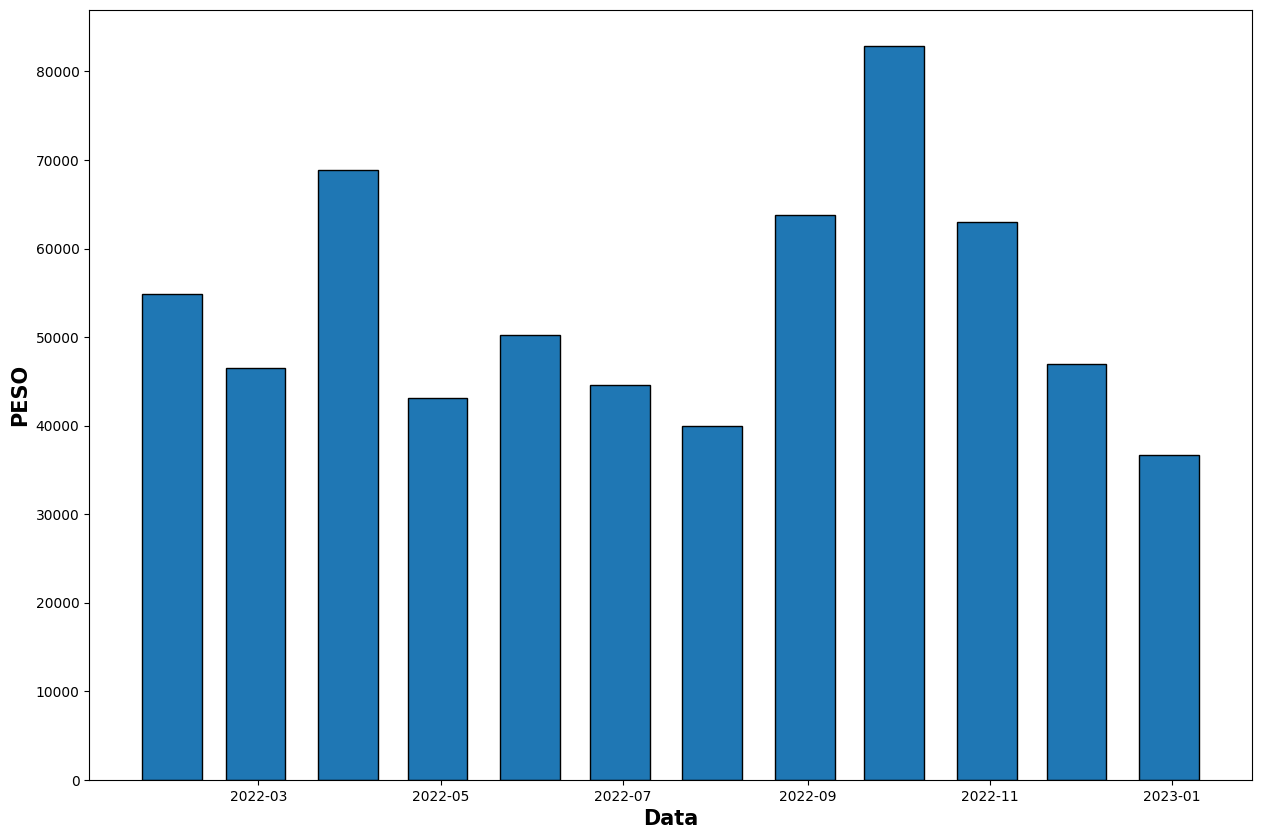

In [33]:
name = monthly_data['DATA MOVIMENTAÇÃO'].head(12)
price = monthly_data['PESO'].head(12)
 
# Figure Size
fig = plt.figure(figsize =(15, 10))
 
# Horizontal Bar Plot
plt.bar(name[0:12], price[0:12], width = 20, edgecolor ='black')
 
# NAME The AXES
plt.xlabel('Data', fontweight ='bold', fontsize = 15) 
plt.ylabel('PESO', fontweight ='bold', fontsize = 15)  
 
# Show Plot
plt.show()

In [19]:
monthly_week_data = weekly_data.groupby(pd.Grouper(key='DATA MOVIMENTAÇÃO', freq='M')).sum()
monthly_week_data.head(12)

,ID LOTE,n° DIAS,ORDEM LINHA,QTD INICIAL,CONVERSÃO,SOBREVIVENCIA,QUANTIDADE,PESO,PESO ESPERADO,DIF. PESO,PERCENTUAL PREV X REAL,BIOMASSA,BIOMASSA ESPERADA,BIOMASSA ESPERADA TOTAL,SALDO DIA ANTERIOR,% MORTE DIA ANTERIOR
DATA MOVIMENTAÇÃO,,,,,,,,,,,,,,,,
2022-01-31,331796,6162,561,390496,115.392152,4994.04,310011,50896,53159.358202,2263.358202,5170.267158,289978.107,304901.827858,338365.445386,344042.0,0
2022-02-28,315262,5207,437,371430,104.373504,4533.47,292130,45960,48113.024085,2153.024085,4678.574158,271904.670,286648.630269,317239.108444,323312.0,0
2022-03-31,461763,5478,646,504966,148.555800,6366.58,400788,59922,63417.850215,3495.850215,6240.264991,363975.729,385782.101716,416186.885962,432935.0,0
2022-04-30,465227,4684,613,462730,143.603246,6096.69,360347,56597,58216.716070,1619.716070,6028.062506,327481.297,338369.202238,377805.004864,402597.0,0
2022-05-31,321341,3517,371,292075,99.125138,4027.74,234291,40067,36214.592859,0.592859,3701.936965,227989.050,209614.770447,234509.359872,239590.0,0
2022-06-30,362170,4341,338,319422,99.465805,4391.41,243543,45554,45034.184758,-519.815242,4561.081709,244982.927,242408.574872,267287.605590,268693.0,0
2022-07-31,402254,4897,507,359438,97.424743,4674.73,287421,49159,50641.423645,1482.423645,4661.371969,294676.526,303508.696033,336069.239039,317835.0,0
2022-08-31,421857,5135,514,369126,86.305171,4652.43,288057,50329,52066.729357,1737.729357,4643.029645,302984.155,313958.744992,346210.170791,317984.0,0
2022-09-30,877636,9841,899,577695,161.370545,9222.28,457358,96262,95390.492330,-871.507670,9592.687479,462957.407,459140.053512,514591.177458,512609.0,0


In [20]:
monthly_week_data=monthly_week_data.reset_index()

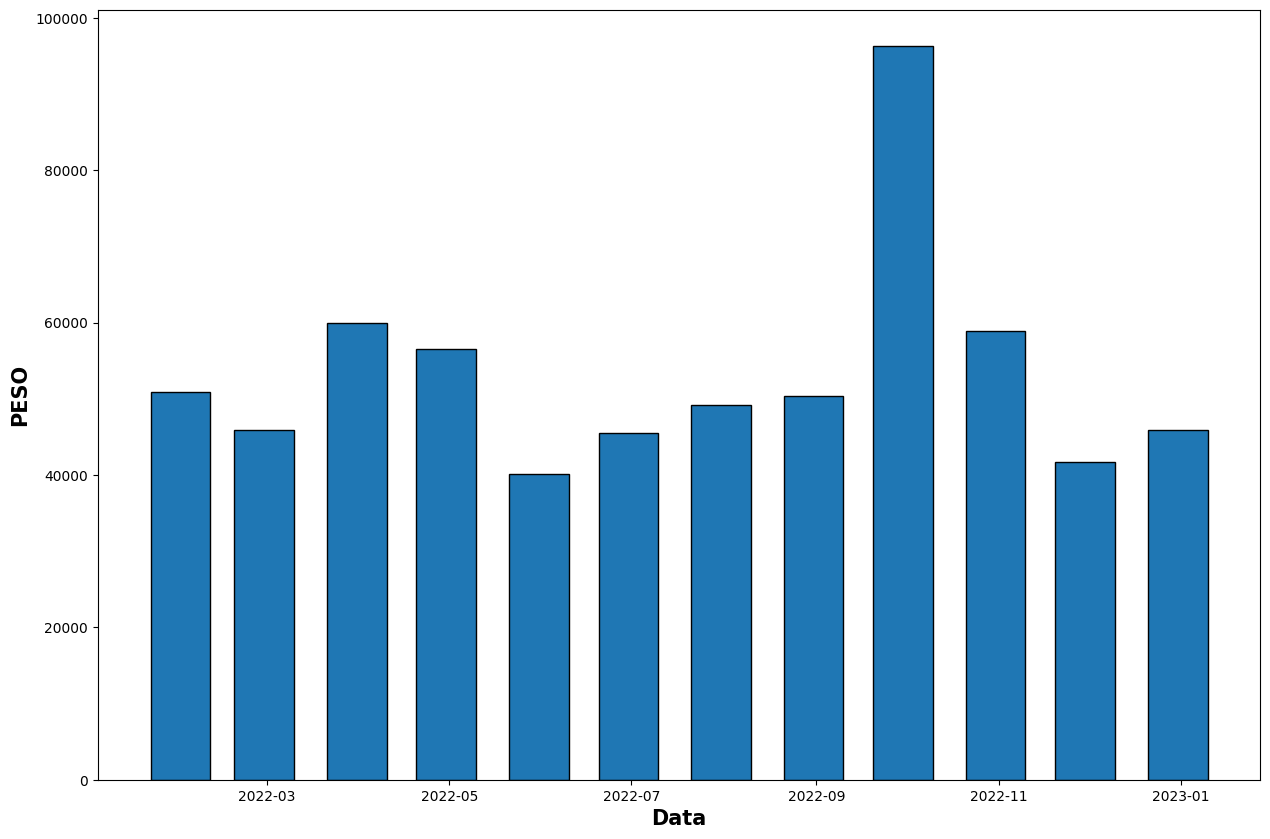

In [21]:
name = monthly_week_data['DATA MOVIMENTAÇÃO'].head(12)
price = monthly_week_data['PESO'].head(12)
 
# Figure Size
fig = plt.figure(figsize =(15, 10))
 
# Horizontal Bar Plot
plt.bar(name[0:12], price[0:12], width = 20, edgecolor ='black')
 
# NAME The AXES
plt.xlabel('Data', fontweight ='bold', fontsize = 15) 
plt.ylabel('PESO', fontweight ='bold', fontsize = 15)  
 
# Show Plot
plt.show()

In [22]:
monthly_week_data.describe()

,ID LOTE,n° DIAS,ORDEM LINHA,QTD INICIAL,CONVERSÃO,SOBREVIVENCIA,QUANTIDADE,PESO,PESO ESPERADO,DIF. PESO,PERCENTUAL PREV X REAL,BIOMASSA,BIOMASSA ESPERADA,BIOMASSA ESPERADA TOTAL,SALDO DIA ANTERIOR,% MORTE DIA ANTERIOR
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.0
mean,450396.166667,5357.083333,525.500000,383990.416667,109.283878,5270.292500,309528.750000,53446.166667,54058.991118,1269.907785,5258.344310,302206.505083,306803.879919,337206.294129,335844.000000,0.0
std,152765.953328,1606.757800,151.659007,88657.831698,27.850143,1456.840972,66312.359855,14891.749362,14866.839968,1231.288427,1551.907220,62988.427502,65527.485153,73878.938352,77937.394823,0.0
min,315262.000000,3517.000000,338.000000,281809.000000,71.461771,4027.740000,234291.000000,40067.000000,36214.592859,-871.507670,3701.936965,227989.050000,209614.770447,234509.359872,239590.000000,0.0
25%,354576.500000,4598.250000,429.000000,331110.750000,94.644850,4497.955000,273707.750000,45842.000000,46884.966188,741.363812,4556.596587,267171.270750,278557.579070,301309.800081,290495.500000,0.0
50%,415026.000000,5016.000000,510.500000,364282.000000,100.180615,4663.580000,290093.500000,49744.000000,51354.076501,1523.158488,4669.973063,292327.316500,297128.871687,326654.173742,317909.500000,0.0
75%,469158.500000,5640.500000,580.000000,408554.500000,122.444926,5779.830000,322595.000000,57172.500000,56445.644615,1841.553039,5485.921744,317360.669500,320061.359304,354108.879310,358680.750000,0.0
max,877636.000000,9841.000000,899.000000,577695.000000,161.370545,9222.280000,457358.000000,96262.000000,95390.492330,3495.850215,9592.687479,462957.407000,459140.053512,514591.177458,512609.000000,0.0


## Medias semanais

In [18]:
# Assuming you have a DataFrame 'df' with a column named 'DATA MOVIMENTAÇÃO'
# containing the dates

# Sample DataFrame creation
#data = {'DATA MOVIMENTAÇÃO': pd.date_range(start='2022-01-01', end='2022-04-01', freq='D'),
#        'value': range(1, 92)}
#df = pd.DataFrame(data)

# Convert 'DATA MOVIMENTAÇÃO' to datetime if it's not already
df['DATA MOVIMENTAÇÃO'] = pd.to_datetime(df['DATA MOVIMENTAÇÃO'])

# Divide data by week
weekly_data_median = df.groupby(pd.Grouper(key='DATA MOVIMENTAÇÃO', freq='W-FRI')).median()

# Divide data by month
monthly_data_median = df.groupby(pd.Grouper(key='DATA MOVIMENTAÇÃO', freq='M')).median()

#print("Weekly Data:")
#print(weekly_data)
#print("\nMonthly Data:")
#print(monthly_data)

C:\Users\crist\AppData\Local\Temp\ipykernel_11912\132427932.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weekly_data_median = df.groupby(pd.Grouper(key='DATA MOVIMENTAÇÃO', freq='W-FRI')).median()
C:\Users\crist\AppData\Local\Temp\ipykernel_11912\132427932.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_data_median = df.groupby(pd.Grouper(key='DATA MOVIMENTAÇÃO', freq='M')).median()


In [19]:
## save median week
median_week = weekly_data_median.copy()
tabela = tabulate(median_week, headers="firstrow", tablefmt="sheet")
median_week.to_excel('median_week.xlsx', index = False)

######################################################################

## save median month
median_month = monthly_data_median.copy()
tabela = tabulate(median_month, headers="firstrow", tablefmt="sheet")
median_month.to_excel('median_month.xlsx', index = False)

In [24]:
weekly_data_median=weekly_data_median.reset_index()

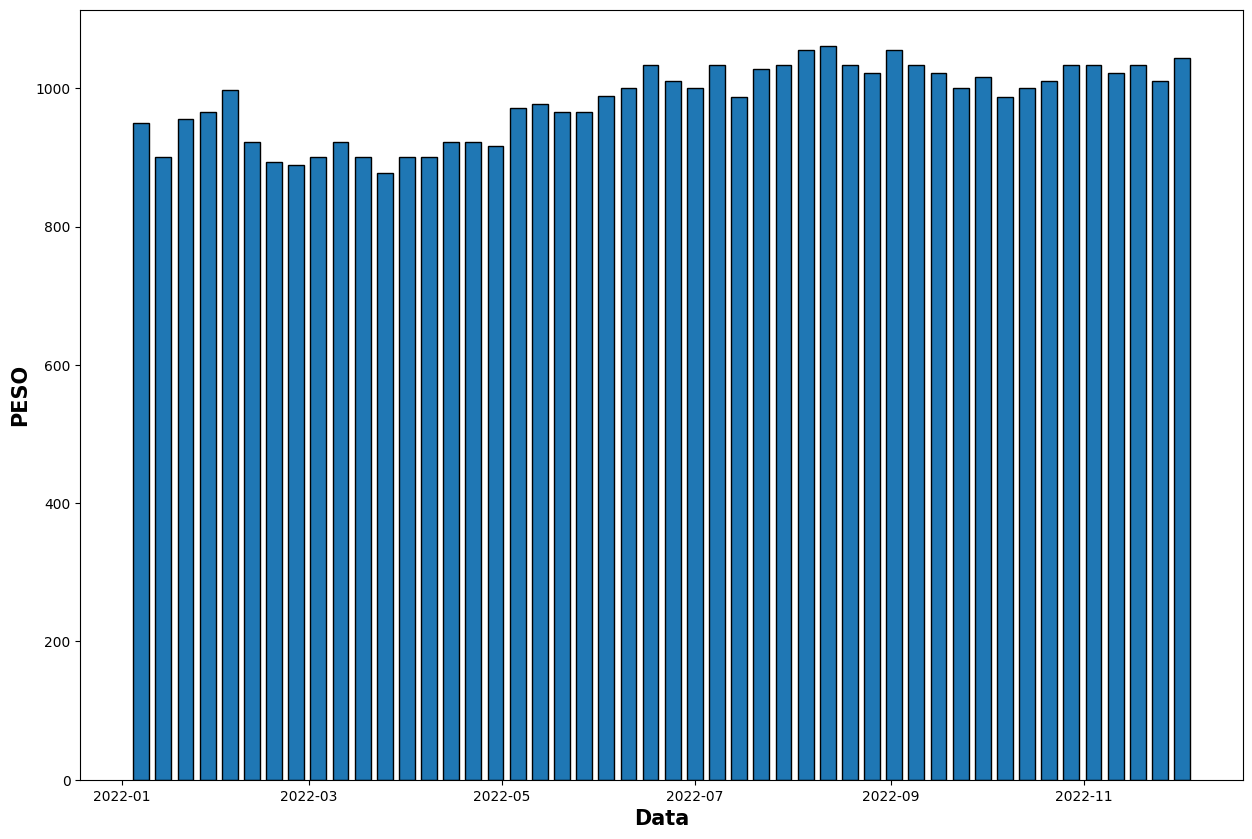

In [25]:
name = weekly_data_median['DATA MOVIMENTAÇÃO'].head(48)
price = weekly_data_median['PESO'].head(48)
 
# Figure Size
fig = plt.figure(figsize =(15, 10))
 
# Horizontal Bar Plot
plt.bar(name[0:48], price[0:48], width = 5, edgecolor ='black')
 
# NAME The AXES
plt.xlabel('Data', fontweight ='bold', fontsize = 15) 
plt.ylabel('PESO', fontweight ='bold', fontsize = 15)  
 
# Show Plot
plt.show()

In [26]:
month_weekly_data_median= weekly_data_median.groupby(pd.Grouper(key='DATA MOVIMENTAÇÃO', freq='M')).sum()
month_weekly_data_median.head(12)

,ID LOTE,n° DIAS,ORDEM LINHA,QTD INICIAL,CONVERSÃO,SOBREVIVENCIA,QUANTIDADE,PESO,PESO ESPERADO,DIF. PESO,PERCENTUAL PREV X REAL,BIOMASSA,BIOMASSA ESPERADA,BIOMASSA ESPERADA TOTAL,SALDO DIA ANTERIOR,% MORTE DIA ANTERIOR
DATA MOVIMENTAÇÃO,,,,,,,,,,,,,,,,
2022-01-31,24633.0,458.5,42.0,29291.0,8.452895,373.315,24166.0,3770.5,3930.312184,178.636125,381.958822,23012.5975,23899.255996,27371.151812,27749.5,0.0
2022-02-28,25900.0,413.0,33.5,32428.0,8.407441,375.000,27822.5,3701.5,3920.272515,224.856961,377.079960,25682.2675,27128.010590,30273.998866,31226.5,0.0
2022-03-31,27949.0,327.0,35.5,32245.0,8.950423,389.735,29234.0,3599.0,3843.312986,214.640003,377.743284,26278.2635,28217.688879,30434.566750,31613.0,0.0
2022-04-30,37618.5,383.0,47.0,40250.5,11.653250,494.495,32852.0,4560.5,4696.416074,114.372435,488.024031,30063.0725,30899.825632,35792.101706,38394.5,0.0
2022-05-31,31380.5,342.0,33.5,32528.0,9.889667,397.350,23691.5,3880.5,3883.397724,8.411239,399.181080,23491.5520,23465.100523,29964.692119,30954.0,0.0
2022-06-30,32511.0,362.5,32.0,30466.0,8.873070,395.645,23137.5,4032.5,3928.353994,-39.836559,404.240324,22575.9590,22757.832421,27158.158410,28003.5,0.0
2022-07-31,41910.0,508.5,49.5,40444.0,10.093863,487.805,33047.0,5081.5,5281.222963,151.575034,485.791845,33660.8150,34737.879822,39544.903449,37536.5,0.0
2022-08-31,35179.0,423.0,48.5,32381.0,7.119819,388.655,30689.5,4170.5,4375.095913,141.432864,387.184773,32202.6075,33277.781341,34027.000899,31352.0,0.0
2022-09-30,46149.5,524.0,49.0,30593.0,8.356670,488.175,23084.5,5126.5,5105.242902,-55.794025,505.834543,23775.2565,23428.244402,24600.026188,24107.0,0.0


In [28]:
month_weekly_data_median=month_weekly_data_median.reset_index()

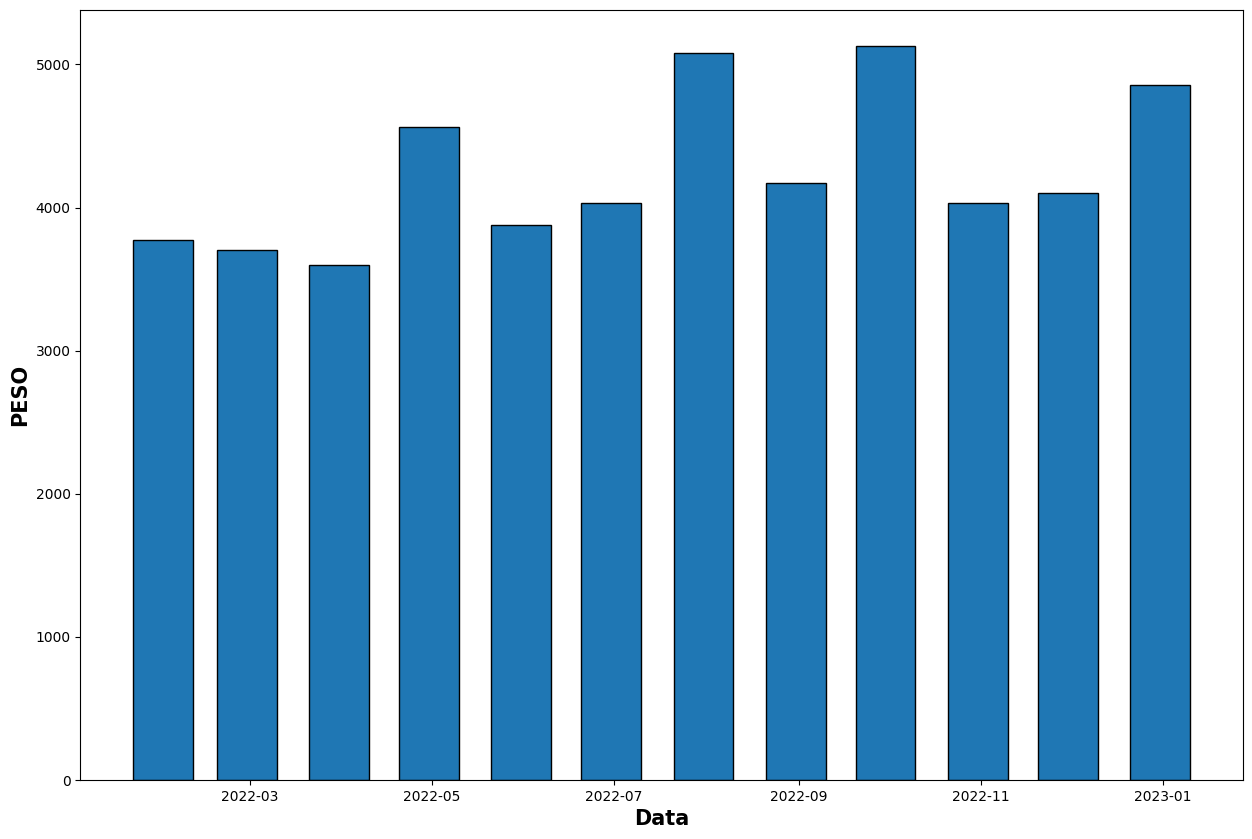

In [29]:
name = month_weekly_data_median['DATA MOVIMENTAÇÃO'].head(12)
price = month_weekly_data_median['PESO'].head(12)
 
# Figure Size
fig = plt.figure(figsize =(15, 10))
 
# Horizontal Bar Plot
plt.bar(name[0:12], price[0:12], width = 20, edgecolor ='black')
 
# NAME The AXES
plt.xlabel('Data', fontweight ='bold', fontsize = 15) 
plt.ylabel('PESO', fontweight ='bold', fontsize = 15)  
 
# Show Plot
plt.show()

In [21]:
weekly_data_median.head(48)

,ID LOTE,n° DIAS,ORDEM LINHA,QTD INICIAL,CONVERSÃO,SOBREVIVENCIA,QUANTIDADE,PESO,PESO ESPERADO,DIF. PESO,PERCENTUAL PREV X REAL,BIOMASSA,BIOMASSA ESPERADA,BIOMASSA ESPERADA TOTAL,SALDO DIA ANTERIOR,% MORTE DIA ANTERIOR
DATA MOVIMENTAÇÃO,,,,,,,,,,,,,,,,
2022-01-07,6027.0,119.0,8.0,4597.0,2.056096,93.835,4386.0,949.5,975.444697,49.643774,95.058570,4144.8500,4376.002299,4350.421861,4402.5,0.0
2022-01-14,6165.0,110.0,13.0,8356.0,2.203036,93.040,7433.0,900.0,983.188659,78.561061,92.002881,7151.9520,7354.884317,7670.004151,7783.0,0.0
2022-01-21,6206.0,112.5,8.0,8170.0,2.137574,92.770,7397.0,955.0,983.301182,28.159768,97.150954,6879.6455,7253.738213,7645.172750,7785.0,0.0
2022-01-28,6235.0,117.0,13.0,8168.0,2.056189,93.670,4950.0,966.0,988.377646,22.271521,97.746417,4836.1500,4914.631168,7705.553051,7779.0,0.0
2022-02-04,6362.0,106.0,7.0,8131.0,2.087849,91.410,7125.0,997.0,1005.054122,11.159324,98.893099,7060.8750,7119.715586,7671.642360,7762.0,0.0
2022-02-11,6427.0,104.5,9.0,8095.5,2.118489,93.150,7090.0,922.0,989.708564,64.112635,93.570192,6482.6760,6916.825643,7562.455474,7798.0,0.0
2022-02-18,6544.5,98.0,5.5,8067.5,2.150204,92.965,5879.5,894.0,950.269385,63.061602,93.488302,5361.2605,5511.864951,7280.274459,7734.5,0.0
2022-02-25,6566.5,104.5,12.0,8134.0,2.050899,97.475,7728.0,888.5,975.240444,86.523399,91.128368,6777.4560,7579.604410,7759.626572,7932.0,0.0
2022-03-04,6782.5,83.5,8.5,8069.0,2.102735,96.630,7676.5,900.0,983.875758,73.626014,92.442651,6852.0720,7555.781446,7744.390378,7870.5,0.0


## Media mensal

In [34]:
weekly_data_median=weekly_data_median.reset_index()

In [35]:
weekly_data_median_month = weekly_data_median.groupby(pd.Grouper(key='DATA MOVIMENTAÇÃO', freq='M')).median()

In [36]:
weekly_data_median_month.head(12)

,index,ID LOTE,n° DIAS,ORDEM LINHA,QTD INICIAL,CONVERSÃO,SOBREVIVENCIA,QUANTIDADE,PESO,PESO ESPERADO,DIF. PESO,PERCENTUAL PREV X REAL,BIOMASSA,BIOMASSA ESPERADA,BIOMASSA ESPERADA TOTAL,SALDO DIA ANTERIOR,% MORTE DIA ANTERIOR
DATA MOVIMENTAÇÃO,,,,,,,,,,,,,,,,,
2022-01-31,1.5,6185.50,114.75,10.50,8169.00,2.096881,93.3550,6173.50,952.25,983.244920,38.901771,96.104762,5857.89775,6084.184690,7657.588450,7781.00,0.0
2022-02-28,5.5,6485.75,104.50,8.00,8113.25,2.103169,93.0575,7107.50,908.00,982.474504,63.587119,93.529247,6630.06600,7018.270614,7617.048917,7780.00,0.0
2022-03-31,9.5,7027.00,83.00,7.75,8065.50,2.249188,97.2350,7637.25,900.00,966.122544,50.005498,94.867772,6695.41925,7312.634348,7606.146380,7888.50,0.0
2022-04-30,14.0,7519.50,79.00,9.00,8042.00,2.280226,99.2350,6424.00,916.50,937.719076,29.077960,96.942631,5993.59200,5993.592000,7418.418379,7961.00,0.0
2022-05-31,18.5,7824.75,85.75,7.25,8102.00,2.441308,99.3200,5810.75,968.75,971.597446,0.600471,99.936042,5776.09800,5792.846246,7768.827121,8013.25,0.0
2022-06-30,22.5,8127.00,91.25,6.50,8106.00,2.201311,99.0725,5678.00,1005.50,978.709825,-14.124481,101.454186,5604.04350,5557.416282,7702.771029,7938.50,0.0
2022-07-31,27.0,8337.00,102.00,9.00,8100.00,2.035057,97.6000,7047.50,1027.50,1045.829933,19.053627,98.188911,7320.32200,7454.190780,8118.254808,7814.00,0.0
2022-08-31,31.5,8795.00,104.75,13.00,8099.00,1.797433,97.0775,7695.00,1044.00,1106.129981,36.090520,96.770979,8108.88275,8370.392969,8576.460743,7828.00,0.0
2022-09-30,36.0,9235.00,105.00,8.00,6098.00,1.679958,97.4100,4241.00,1022.00,1017.204898,-13.829420,101.334658,4309.95350,4342.399682,4260.457160,4028.50,0.0


In [37]:
weekly_data_median_month=weekly_data_median_month.reset_index()

In [38]:
weekly_data_median_month.head(12)

,DATA MOVIMENTAÇÃO,index,ID LOTE,n° DIAS,ORDEM LINHA,QTD INICIAL,CONVERSÃO,SOBREVIVENCIA,QUANTIDADE,PESO,PESO ESPERADO,DIF. PESO,PERCENTUAL PREV X REAL,BIOMASSA,BIOMASSA ESPERADA,BIOMASSA ESPERADA TOTAL,SALDO DIA ANTERIOR,% MORTE DIA ANTERIOR
0,2022-01-31,1.5,6185.50,114.75,10.50,8169.00,2.096881,93.3550,6173.50,952.25,983.244920,38.901771,96.104762,5857.89775,6084.184690,7657.588450,7781.00,0.0
1,2022-02-28,5.5,6485.75,104.50,8.00,8113.25,2.103169,93.0575,7107.50,908.00,982.474504,63.587119,93.529247,6630.06600,7018.270614,7617.048917,7780.00,0.0
2,2022-03-31,9.5,7027.00,83.00,7.75,8065.50,2.249188,97.2350,7637.25,900.00,966.122544,50.005498,94.867772,6695.41925,7312.634348,7606.146380,7888.50,0.0
3,2022-04-30,14.0,7519.50,79.00,9.00,8042.00,2.280226,99.2350,6424.00,916.50,937.719076,29.077960,96.942631,5993.59200,5993.592000,7418.418379,7961.00,0.0
4,2022-05-31,18.5,7824.75,85.75,7.25,8102.00,2.441308,99.3200,5810.75,968.75,971.597446,0.600471,99.936042,5776.09800,5792.846246,7768.827121,8013.25,0.0
5,2022-06-30,22.5,8127.00,91.25,6.50,8106.00,2.201311,99.0725,5678.00,1005.50,978.709825,-14.124481,101.454186,5604.04350,5557.416282,7702.771029,7938.50,0.0
6,2022-07-31,27.0,8337.00,102.00,9.00,8100.00,2.035057,97.6000,7047.50,1027.50,1045.829933,19.053627,98.188911,7320.32200,7454.190780,8118.254808,7814.00,0.0
7,2022-08-31,31.5,8795.00,104.75,13.00,8099.00,1.797433,97.0775,7695.00,1044.00,1106.129981,36.090520,96.770979,8108.88275,8370.392969,8576.460743,7828.00,0.0
8,2022-09-30,36.0,9235.00,105.00,8.00,6098.00,1.679958,97.4100,4241.00,1022.00,1017.204898,-13.829420,101.334658,4309.95350,4342.399682,4260.457160,4028.50,0.0
9,2022-10-31,40.5,9538.75,109.50,8.50,5346.50,1.727144,98.7400,5464.75,1005.50,1033.733054,25.372568,97.546779,5527.90700,5376.995555,5249.979885,5085.25,0.0


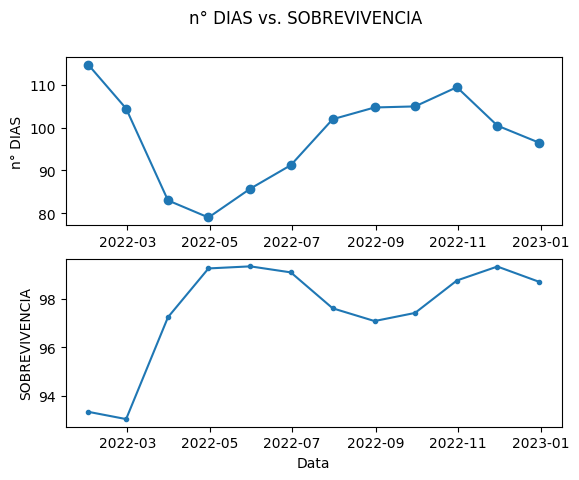

In [39]:
# sELECTING X AND Y  data.
x1 = weekly_data_median_month['DATA MOVIMENTAÇÃO']
y1 = weekly_data_median_month['n° DIAS']
x2 = weekly_data_median_month['DATA MOVIMENTAÇÃO']
y2 = weekly_data_median_month['SOBREVIVENCIA']


fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle('n° DIAS vs. SOBREVIVENCIA')

ax1.plot(x1, y1, 'o-')
ax1.set_ylabel('n° DIAS')

ax2.plot(x2, y2, '.-')
ax2.set_xlabel('Data')
ax2.set_ylabel('SOBREVIVENCIA')

plt.show()

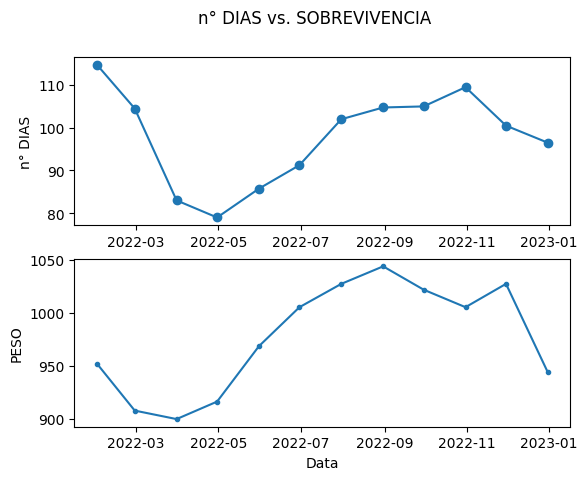

In [41]:
# sELECTING X AND Y  data.
x1 = weekly_data_median_month['DATA MOVIMENTAÇÃO']
y1 = weekly_data_median_month['n° DIAS']
x2 = weekly_data_median_month['DATA MOVIMENTAÇÃO']
y2 = weekly_data_median_month['PESO']


fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle('n° DIAS vs. SOBREVIVENCIA')

ax1.plot(x1, y1, 'o-')
ax1.set_ylabel('n° DIAS')

ax2.plot(x2, y2, '.-')
ax2.set_xlabel('Data')
ax2.set_ylabel('PESO')

plt.show()

In [ ]:
### make a cipy of the df

dados = prod_num_final.copy()

## create a table to save as escel file
tabela = tabulate(dados, headers="firstrow", tablefmt="sheet")
#dados.to_excel('prod_num.xlsx', index = False)
#all
#sum_month
#sum_week
#median_month
#median_week